### Introduction to the Analysis

This analysis is centered around evaluating the relationship between movie genres and their worldwide box office performance. It involves merging two datasets, cleaning and processing the data, calculating key statistics, and performing statistical tests to determine the significance of genre on box office success. Here’s a breakdown of the key steps:

---

### **1. Data Preparation**
- **Data Merging**:
  - Two datasets, `movies.csv` and `movieid_correct_numbers_movies.csv`, are merged on the `movie_id` column using an **inner join**.
- **Data Cleaning**:
  - Duplicate rows are identified and counted.
  - Missing values (`NaNs`) are replaced with 0 for analysis.
  - Financial columns (`box_office_domestic`, `box_office_international`) are cleaned and converted to numeric values for calculations.

---

### **2. Data Transformation**
- **Worldwide Box Office Calculation**:
  - A new column, `box_office_worldwide`, is created by summing the domestic and international box office revenues.
- **Genre Grouping**:
  - The dataset is grouped by `genre` to calculate the **average worldwide box office revenue** for each genre.
- **Genre Count**:
  - The number of data points in each genre is counted to ensure sufficient representation.

---

### **3. Statistical Analysis**
- **Kruskal-Wallis H Test**:
  - This non-parametric test is applied to compare worldwide box office revenue across genres.
  - Results include:
    - \( H \)-statistic: Measures the differences between group medians.
    - \( p \)-value: Indicates whether the differences are statistically significant.
- **Interpretation**:
  - A very small \( p \)-value suggests significant differences in revenue across genres.

---

### **4. Visualization**
- **Bar Chart**:
  - Displays the average worldwide box office revenue for each genre.
  - Highlights the top-performing genres (e.g., Animation, Action, Adventure).
- **Boxplot**:
  - Illustrates the distribution of worldwide box office revenue by genre, showing medians, ranges, and outliers.

---

### **Key Insights**
1. **Top-Performing Genres**:
   - Animation, Action, and Adventure are the most commercially successful genres.
   - Animation leads with the highest average revenue.
2. **Low-Performing Genres**:
   - Genres like Western, Musical, and Documentary have consistently lower revenues.
3. **Statistical Significance**:
   - The Kruskal-Wallis H test confirms significant differences in revenue across genres.
   - Genre is a critical factor in determining box office success.

---

### **Conclusion**
This analysis highlights the importance of genre in influencing box office performance. Certain genres consistently outperform others, emphasizing the commercial appeal of blockbuster categories like Animation and Action. The results are statistically significant, indicating meaningful differences in box office performance between genres.

In [1]:
import pandas as pd

# Define file paths
movies = "/Users/iyayiiguodala/Downloads/movies.csv"
boxoffice = "/Users/iyayiiguodala/Downloads/movieid_correct_numbers_movies.csv"
output_file_path = "/Users/iyayiiguodala/Downloads/merged_movies.csv"

In [ ]:
import pandas as pd

# Read the files
df1 = pd.read_csv(movies)  # movies.csv
df2 = pd.read_csv(boxoffice, delimiter=';')  # movieid_correct_numbers_movies.csv with ; as delimiter

# Perform a left join on 'movie_id'
merged_df = pd.merge(df1, df2, on='movie_id', how='inner')

# Display the merged DataFrame in the notebook
print("Merged Movies Table (Left Join):")
display(merged_df)  # This will render the DataFrame as a table in Jupyter Notebook

Merged Movies Table (Left Join):


,id,title_x,metascores,userscores,movie_url,rated,genre,release_date,release_year,movie_id,title_y,year,production_budget,box_office_domestic,box_office_international,box_office_worldwide,movie_link
0,16323,Pinocchio,99,8.2,https://www.metacritic.com/movie/pinocchio-1940/,Passed,Animation,1940-02-23,1940,Pinocchio1940,Pinocchio,1940.0,"$2,289,247","$84,300,000",NaN,"$84,300,000",https://www.the-numbers.com/movie/Pinocchio-(1...
1,16329,Moonlight,99,7.1,https://www.metacritic.com/movie/moonlight-2016/,R,Drama,2016-10-21,2016,Moonlight2016,Moonlight,2016.0,"$1,500,000","$27,854,931","$37,040,175","$64,895,106",https://www.the-numbers.com/movie/Moonlight-(2...
2,16331,Vertigo,100,8.6,https://www.metacritic.com/movie/vertigo-1958/,TV-PG,Mystery,1958-05-28,1958,Vertigo1958,Vertigo,1958.0,Not_Available,"$3,200,000","$94,394","$3,294,394",https://www.the-numbers.com/movie/Vertigo-(195...
3,16336,Notorious,100,7.9,https://www.metacritic.com/movie/notorious-1946/,Not Rated,Drama,1946-09-06,1946,Notorious1946,Notorious,1946.0,"$2,000,000","$24,464,742","$30,939","$24,495,681",https://www.the-numbers.com/movie/Notorious-(1...
4,16337,Boyhood,100,7.6,https://www.metacritic.com/movie/boyhood/,TV-14,Drama,2014-07-11,2014,Boyhood2014,Boyhood,2014.0,"$4,000,000","$25,379,975","$31,893,074","$57,273,049",https://www.the-numbers.com/movie/Boyhood#tab=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,32624,Expired,62,NaN,https://www.metacritic.com/movie/expired/,R,Comedy,2008-06-20,2008,Expired2008,Expired,2008.0,Not_Available,"$21,489",NaN,"$21,489",https://www.the-numbers.com/movie/Expired#tab=...
2460,32626,Buzzard,77,5.7,https://www.metacritic.com/movie/buzzard/,Not Rated,Comedy,2015-03-06,2015,Buzzard2015,Buzzard,2015.0,Not_Available,"$14,591",NaN,"$14,591",https://www.the-numbers.com/movie/Buzzard#tab=...
2461,32629,Amy,85,8.1,https://www.metacritic.com/movie/amy-2015/,R,Documentary,2015-07-03,2015,Amy2015,Amy,2015.0,Not_Available,"$8,413,144","$15,365,441","$23,778,585",https://www.the-numbers.com/movie/Amy-(2015)#t...
2462,32639,Lincoln,87,7.4,https://www.metacritic.com/movie/lincoln/,TV-14,Biography,2012-11-09,2012,Lincoln2012,Lincoln,2012.0,"$65,000,000","$182,207,973","$91,138,308","$273,346,281",https://www.the-numbers.com/movie/Lincoln#tab=...


In [16]:
# 1. check if there are duplicate rows
duplicate_row_count= merged_df.duplicated().sum()
print('the number of duplicate rows in the merged_df data is: ' ,duplicate_row_count )

the number of duplicate rows in the merged_df data is:  0


In [17]:
# Check for NaNs
print('Printing total number of NaNs in the DataFrame:')
print(merged_df.isnull().sum())

# Replace NaNs with 0
merged_df = merged_df.fillna(0)

# Verify the changes
print('\nAfter replacing NaNs with 0:')
print(merged_df.isnull().sum())  # Should print 0 for all columns

Printing total number of NaNs in the DataFrame:
id                            0
title_x                       0
metascores                    0
userscores                  357
movie_url                     0
rated                       138
genre                         0
release_date                  0
release_year                  0
movie_id                      0
title_y                       0
year                          0
production_budget             0
box_office_domestic         220
box_office_international    801
box_office_worldwide          0
movie_link                    0
dtype: int64

After replacing NaNs with 0:
id                          0
title_x                     0
metascores                  0
userscores                  0
movie_url                   0
rated                       0
genre                       0
release_date                0
release_year                0
movie_id                    0
title_y                     0
year                        0
produ

In [20]:
# Ensure box_office_domestic and box_office_international are numeric
merged_df['box_office_domestic'] = merged_df['box_office_domestic'].replace('[\$,]', '', regex=True).astype(float)
merged_df['box_office_international'] = merged_df['box_office_international'].replace('[\$,]', '', regex=True).astype(float)

# Calculate box_office_worldwide directly in the existing DataFrame
merged_df['box_office_worldwide'] = merged_df['box_office_domestic'] + merged_df['box_office_international']

# Verify the update by displaying the relevant columns
print("Updated DataFrame with box_office_worldwide column:")
merged_df

Updated DataFrame with box_office_worldwide column:


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/fd/l329ntgd4z9f7sy307_pc2480000gn/T/ipykernel_45298/1842540434.py:2: SyntaxWarning: invalid escape sequence '\$'
  merged_df['box_office_domestic'] = merged_df['box_office_domestic'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/fd/l329ntgd4z9f7sy307_pc2480000gn/T/ipykernel_45298/1842540434.py:3: SyntaxWarning: invalid escape sequence '\$'
  merged_df['box_office_international'] = merged_df['box_office_international'].replace('[\$,]', '', regex=True).astype(float)


,id,title_x,metascores,userscores,movie_url,rated,genre,release_date,release_year,movie_id,title_y,year,production_budget,box_office_domestic,box_office_international,box_office_worldwide,movie_link
0,16323,Pinocchio,99,8.2,https://www.metacritic.com/movie/pinocchio-1940/,Passed,Animation,1940-02-23,1940,Pinocchio1940,Pinocchio,1940.0,"$2,289,247",84300000.0,0.0,84300000.0,https://www.the-numbers.com/movie/Pinocchio-(1...
1,16329,Moonlight,99,7.1,https://www.metacritic.com/movie/moonlight-2016/,R,Drama,2016-10-21,2016,Moonlight2016,Moonlight,2016.0,"$1,500,000",27854931.0,37040175.0,64895106.0,https://www.the-numbers.com/movie/Moonlight-(2...
2,16331,Vertigo,100,8.6,https://www.metacritic.com/movie/vertigo-1958/,TV-PG,Mystery,1958-05-28,1958,Vertigo1958,Vertigo,1958.0,Not_Available,3200000.0,94394.0,3294394.0,https://www.the-numbers.com/movie/Vertigo-(195...
3,16336,Notorious,100,7.9,https://www.metacritic.com/movie/notorious-1946/,Not Rated,Drama,1946-09-06,1946,Notorious1946,Notorious,1946.0,"$2,000,000",24464742.0,30939.0,24495681.0,https://www.the-numbers.com/movie/Notorious-(1...
4,16337,Boyhood,100,7.6,https://www.metacritic.com/movie/boyhood/,TV-14,Drama,2014-07-11,2014,Boyhood2014,Boyhood,2014.0,"$4,000,000",25379975.0,31893074.0,57273049.0,https://www.the-numbers.com/movie/Boyhood#tab=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,32624,Expired,62,0.0,https://www.metacritic.com/movie/expired/,R,Comedy,2008-06-20,2008,Expired2008,Expired,2008.0,Not_Available,21489.0,0.0,21489.0,https://www.the-numbers.com/movie/Expired#tab=...
2460,32626,Buzzard,77,5.7,https://www.metacritic.com/movie/buzzard/,Not Rated,Comedy,2015-03-06,2015,Buzzard2015,Buzzard,2015.0,Not_Available,14591.0,0.0,14591.0,https://www.the-numbers.com/movie/Buzzard#tab=...
2461,32629,Amy,85,8.1,https://www.metacritic.com/movie/amy-2015/,R,Documentary,2015-07-03,2015,Amy2015,Amy,2015.0,Not_Available,8413144.0,15365441.0,23778585.0,https://www.the-numbers.com/movie/Amy-(2015)#t...
2462,32639,Lincoln,87,7.4,https://www.metacritic.com/movie/lincoln/,TV-14,Biography,2012-11-09,2012,Lincoln2012,Lincoln,2012.0,"$65,000,000",182207973.0,91138308.0,273346281.0,https://www.the-numbers.com/movie/Lincoln#tab=...


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/fd/l329ntgd4z9f7sy307_pc2480000gn/T/ipykernel_45298/1143070079.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['box_office_worldwide'] = df['box_office_worldwide'].replace('[\$,]', '', regex=True).astype(float)


Average Worldwide Box Office by Genre:
genre
Animation      2.577717e+08
Action         1.072669e+08
Adventure      1.037312e+08
Fantasy        9.167236e+07
Horror         4.568716e+07
Mystery        3.795918e+07
Biography      3.729858e+07
Sci-Fi         2.914699e+07
Comedy         2.746990e+07
Crime          2.653261e+07
Drama          2.300728e+07
Western        1.929000e+07
Romance        1.438073e+07
Documentary    2.851517e+06
Thriller       1.852647e+06
Musical        1.578065e+05
Name: box_office_worldwide, dtype: float64


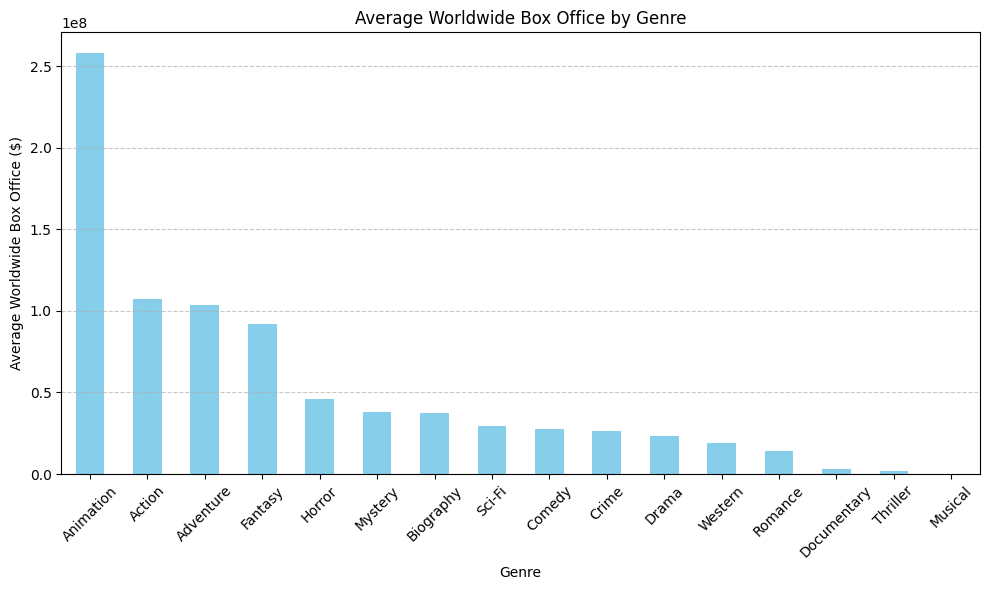

In [24]:
# Ensure box_office_worldwide is numeric
df = merged_df.copy()  # Use the existing DataFrame
df['box_office_worldwide'] = df['box_office_worldwide'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['genre', 'box_office_worldwide'])

# Group by genre and calculate the average worldwide box office
genre_box_office = df.groupby('genre')['box_office_worldwide'].mean().sort_values(ascending=False)

# Display the result
print("Average Worldwide Box Office by Genre:")
print(genre_box_office)

# Optional: Display the result as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
genre_box_office.plot(kind='bar', color='skyblue')
plt.title("Average Worldwide Box Office by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Worldwide Box Office ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusion:
- The data shows that **Animation**, **Action**, and **Adventure** are the most commercially viable genres, with Animation leading by a significant margin.
- Genres like **Musical**, **Thriller**, and **Documentary** struggle to achieve substantial box office success.
- These trends underscore the significant impact of genre choice on worldwide box office performance.

In [39]:
# Count the number of data points in each genre
genre_counts = df['genre'].value_counts()
print("Number of data points in each genre:")
print(genre_counts)

Number of data points in each genre:
genre
Drama          636
Comedy         504
Action         413
Documentary    202
Biography      188
Crime          184
Horror         109
Adventure      103
Animation       81
Fantasy         13
Mystery         10
Thriller         9
Sci-Fi           7
Romance          2
Musical          2
Western          1
Name: count, dtype: int64


In [40]:
from scipy.stats import kruskal

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['genre', 'box_office_worldwide'])

# Group worldwide box office revenues by genre
grouped_genre = [group['box_office_worldwide'].values for _, group in df.groupby('genre')]

# Perform Kruskal-Wallis H test for genre
h_stat, p_value = kruskal(*grouped_genre)

print("\nKruskal-Wallis H Test Results for Genre:")
print(f"H-statistic: {h_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Conclusion: Significant differences exist in worldwide box office revenue between genres.")
else:
    print("Conclusion: No significant differences exist between genres.")


Kruskal-Wallis H Test Results for Genre:
H-statistic: 519.6851371681898
P-value: 3.856993832982068e-101
Conclusion: Significant differences exist in worldwide box office revenue between genres.


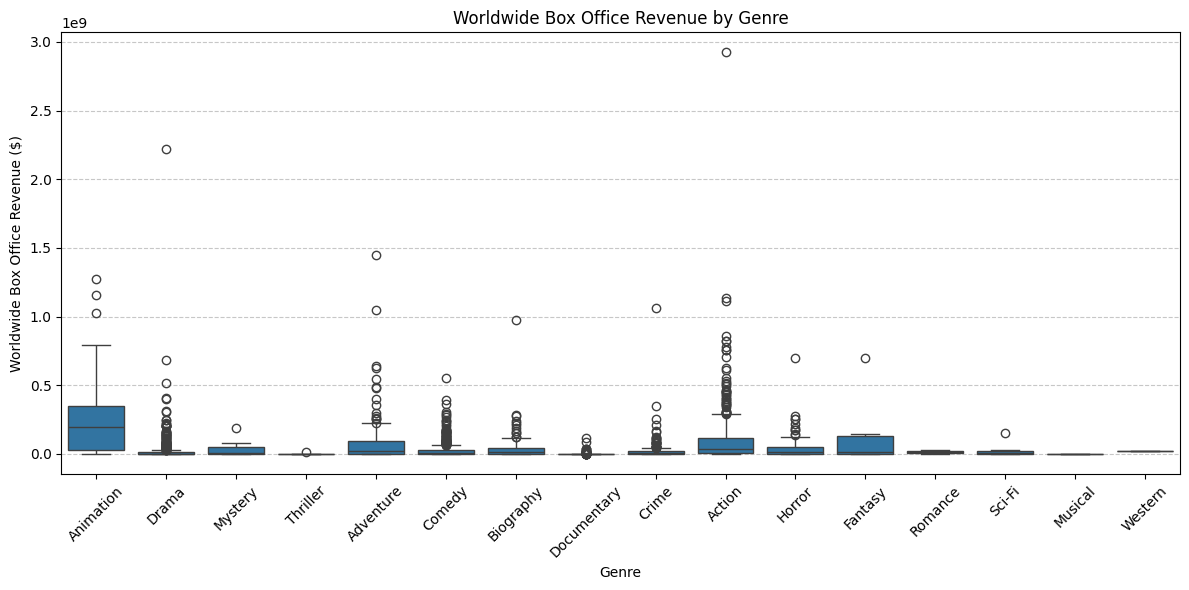

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization: Boxplot of worldwide box office revenue by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='box_office_worldwide')
plt.title("Worldwide Box Office Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Worldwide Box Office Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Conclusion**

- **Statistical Significance**:
  - The Kruskal-Wallis H test likely confirmed that the differences in revenue across genres are statistically significant (as indicated by the small p-value).

- **Genre Impact**:
  - Blockbuster genres like Animation and Action consistently drive higher revenues.
  - Less commercially appealing genres like Western and Musical generally have lower box office performance.

This analysis indicates that **genre is a critical factor in determining box office success**, with certain genres outperforming others significantly.